In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [3]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.test_model, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/*-anoms.nc
Files for CMCC-CM2-SR5: ['/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r4i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r5i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r6i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r3i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/merge

In [4]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data:  <xarray.DataArray 'psl' (time: 60, lat: 24, lon: 48)>
dask.array<open_dataset-d1a297672907711a656eb128e6ee45f5psl, shape=(60, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-07-31 18:00:00 ... 2024-07-31 18:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    comment:        Sea Level Pressure
    original_name:  PSL
    cell_measures:  area: areacella
Variable data type:  <class 'xarray.core.dataarray.DataArray'>
Variable data dimensions:  3
Variable data values:  [-0.19617188 -0.205625   -0.18679687  0.05835937 -0.29179686 -0.34851563
 -0.0846875   0.06570312 -0.12445313 -0.14039062  0.12953125 

In [5]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [6]:
# Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid, 
                               forecast_range, season, obs_path, obs_var_name)

Observations dataset: <xarray.Dataset>
Dimensions:  (time: 252, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 24 13:57:07 2023: cdo -f nc copy /home/users/benhut...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
Checking for NaN values in observations dataset


/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Regridded observations dataset: <xarray.Dataset>
Dimensions:  (time: 252, lat: 73, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 73, 144), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 24 13:57:07 2023: cdo -f nc copy /home/users/benhut...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
checking for NaN values in regridded observations dataset
Region grid dimensions: {'lon1': 280, 'lon2': 40, 'lat1': 60, 'lat2': 20}
Processing dataset before season: <xarray.Dataset>
Dimensions:  (time: 252, l

In [7]:
# check the values of obs
obs["var151"].values

array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             

In [8]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lat: 17, lon: 49)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 50.0 52.5 55.0 57.5 60.0
  * lon      (lon) float64 280.0 282.5 285.0 287.5 290.0 ... 32.5 35.0 37.5 40.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 17, 32), meta=np.ndarray>

Observations dimensions: Frozen({'time': 63, 'lat': 17, 'lon': 49})
Observations variables: <xarray.Dataset>
Dimensions:  (time: 63, lat: 17, lon: 49)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 50.0 52.5 55.0 57.5 60.0
  * lon      (lon) float64 280.0 282.5 285.0 287.5 290.0 ... 32.5 35.0 37.5 40.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 17, 32), meta=np.ndarray>
Observations latitude values: [20.  22.5 25.  27.5 30.  32.5 35.  37.5 40.  42.5 45.  47.5 50.  52.5
 55.  57.5 60. ]
Observations longitude values: [280.  282.5 285.  287.5 290.  292.5 295.  297.5 300.  302.5 305.  307.5
 310.  312.5 315.  317.5 320.  322.5 325.  327.5 330.  332.5 335.  337.5
 340.  342.5 345.  347.5 350.  352.5 355.  357.5   0.    2.5   5.    7.5
  10.   12.5  15.   17.5  20.   22.5  25.   27.5  30.   32.5  35.   37.5
  40. ]
Observations variable: [[ 4.76074219e+01  4.9720

TypeError: Length of x (17) must match number of columns in z (49)

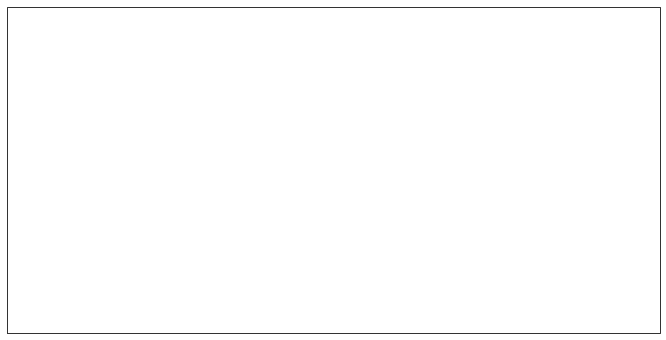

In [9]:
# Attempt to plot the data
fnc.plot_obs_data(obs)